[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.sandbox.google.com/github/kornia/tutorials/blob/master/source/warp_perspective.ipynb)

# Warp image using perspective transform

In this tutorial we are going to learn how to use the functions [kornia.get_perspective_transform](https://kornia.readthedocs.io/en/latest/geometry.transform.html#kornia.geometry.transform.get_perspective_transform) and [kornia.warp_perspective](https://kornia.readthedocs.io/en/latest/geometry.transform.html#kornia.geometry.transform.warp_perspective).

## Install libraries and get the data

In [ ]:
%%capture
!pip install kornia

In [ ]:
%%capture
!wget https://github.com/kornia/data/raw/main/bruce.png

## Import libraries and load the data

In [ ]:
import cv2
import kornia as K
import matplotlib.pyplot as plt
import numpy as np
import torch

In [ ]:
img_bgr: np.ndarray = cv2.imread("bruce.png")  # HxWxC / np.uint8

img: torch.tensor = K.image_to_tensor(img_bgr, keepdim=False)  # 1xCxHxW / torch.uint8
img = K.color.bgr_to_rgb(img)
print(img.shape)

torch.Size([1, 3, 372, 600])


## Define the points to warp, compute the homography and warp

In [ ]:
# the source points are the region to crop corners
points_src = torch.tensor(
    [
        [
            [125.0, 150.0],
            [562.0, 40.0],
            [562.0, 282.0],
            [54.0, 328.0],
        ]
    ]
)

# the destination points are the image vertexes
h, w = 64, 128  # destination size
points_dst = torch.tensor(
    [
        [
            [0.0, 0.0],
            [w - 1.0, 0.0],
            [w - 1.0, h - 1.0],
            [0.0, h - 1.0],
        ]
    ]
)

# compute perspective transform
M: torch.tensor = K.geometry.get_perspective_transform(points_src, points_dst)

# warp the original image by the found transform
img_warp: torch.tensor = K.geometry.warp_perspective(img.float(), M, dsize=(h, w))
print(img_warp.shape)

torch.Size([1, 3, 64, 128])


/home/edgar/software/tutorials/.venv/lib/python3.8/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


## Plot the warped data

<matplotlib.image.AxesImage>

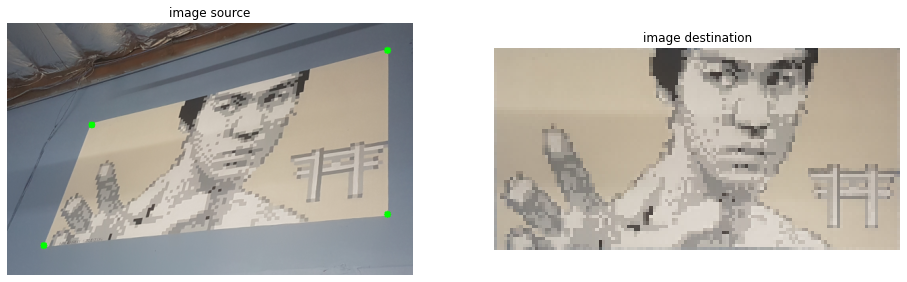

In [ ]:
# convert back to numpy
img_np = K.tensor_to_image(img.byte())
img_warp_np: np.ndarray = K.tensor_to_image(img_warp.byte())

# draw points into original image
for i in range(4):
    center = tuple(points_src[0, i].long().numpy())
    img_np = cv2.circle(img_np.copy(), center, 5, (0, 255, 0), -1)

# create the plot
fig, axs = plt.subplots(1, 2, figsize=(16, 10))
axs = axs.ravel()

axs[0].axis("off")
axs[0].set_title("image source")
axs[0].imshow(img_np)

axs[1].axis("off")
axs[1].set_title("image destination")
axs[1].imshow(img_warp_np)